# making a sine wave approximator

In [2]:
import math
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

In [46]:
n_x=10
n_y=10
state_size = 1
# n_epochs = 1000
n_timesteps = n_x   # number of time steps
n_x_vars = 1  # number of x variables
n_y_vars = 1  # number of y variables
learning_rate = 0.1

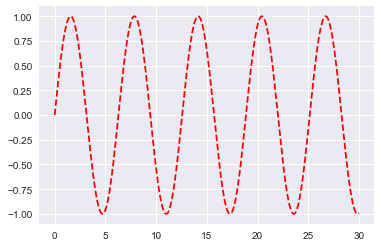

In [47]:
x = list(np.arange(0,30,step=.01))
y = list(np.sin(x))
plt.plot(x,y,'r--')

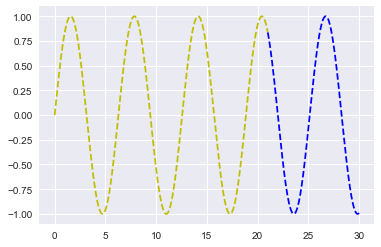

In [48]:
X_train,X_test = np.array(x[:2100]),np.array(x[2100:])
Y_train,Y_test = np.array(y[:2100]),np.array(y[2100:])
plt.plot(X_train,Y_train,'y--')
plt.plot(X_test,Y_test,'b--')

In [97]:
n_epochs = 20
n_timesteps = 5   # number of time steps
n_x_vars = 1  # number of x variables
n_y_vars = 1  # number of y variables
learning_rate = 0.1

# tf.reset_default_graph()
tf.reset_default_graph()
X_p = tf.placeholder(tf.float32, [None, n_timesteps, n_x_vars], name='X_p') 
Y_p = tf.placeholder(tf.float32, [None, n_timesteps, n_y_vars], name='Y_p')

# make a list of tensors of length n_x
rnn_inputs = tf.unstack(X_p,axis=1)

cell = tf.nn.rnn_cell.GRUCell(state_size)
rnn_outputs, final_state = tf.nn.static_rnn(cell, rnn_inputs,dtype=tf.float32)

W = tf.get_variable('W', [state_size, n_y_vars])
b = tf.get_variable('b', [n_y_vars], initializer=tf.constant_initializer(0.0))

predictions = [tf.matmul(rnn_output, W) + b for rnn_output in rnn_outputs]

y_as_list = tf.unstack(Y_p, num=n_timesteps, axis=1)

mse = tf.losses.mean_squared_error
losses = [mse(labels=label, predictions=prediction) for 
          prediction, label in zip(rnn_outputs, y_as_list)
         ]
total_loss = tf.reduce_mean(losses)
optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(total_loss)

with tf.Session() as tfs:
    tfs.run(tf.global_variables_initializer())
    epoch_loss = 0.0
    for epoch in range(n_epochs):
        feed_dict={X_p: X_train.reshape(-1, n_timesteps, 
                                        n_x_vars), 
                   Y_p: Y_train.reshape(-1, n_timesteps, 
                                        n_x_vars)
                  }
        epoch_loss,y_train_pred,_=tfs.run([total_loss,
                                           predictions,
                                           optimizer], 
                                          feed_dict=feed_dict
                                         )
    print("train mse = {}".format(epoch_loss))
    feed_dict={X_p: X_test.reshape(-1, n_timesteps, 
                                    n_x_vars), 
               Y_p: Y_test.reshape(-1, n_timesteps, 
                                    n_y_vars)
              }
    test_loss, y_test_pred,rnn_out,rnn_in,yp = tfs.run([total_loss,predictions,rnn_outputs,
                                                rnn_inputs,y_as_list],feed_dict=feed_dict)
    
    print('test mse = {}'.format(test_loss))
    print('test rmse = {}'.format(math.sqrt(test_loss)))

y_train_pred=y_train_pred[0]
y_test_pred=y_test_pred[0]

#invert predictions
# y_train_pred = scaler.inverse_transform(y_train_pred)
# y_test_pred = scaler.inverse_transform(y_test_pred)

#invert originals
# y_train_orig = scaler.inverse_transform(Y_train)
# y_test_orig = scaler.inverse_transform(Y_test)

# shift train predictions for plotting
# trainPredictPlot = np.empty_like(dataset)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[n_x-1:len(y_train_pred)+n_x-1, :] = y_train_pred
# # shift test predictions for plotting
# testPredictPlot = np.empty_like(dataset)
# testPredictPlot[:, :] = np.nan
# testPredictPlot[len(y_train_pred)+(n_x*2)-1:len(dataset)-1, :]=y_test_pred
# # plot baseline and predictions
# plt.plot(dataset,label='Original Data')
# plt.plot(trainPredictPlot,label='y_train_pred')
# plt.plot(testPredictPlot,label='y_test_pred')
# plt.legend()
# plt.xlabel('Timesteps')
# plt.ylabel('Total Passengers')
# plt.show()

train mse = 0.5437646508216858
test mse = 0.4828551411628723
test rmse = 0.6948777886527042


In [95]:
# plt.plot(X_train,y_train_pred)
# plt.plot(X_test,y_test_pred)
print(np.shape(rnn_out),np.shape(yp),np.shape(rnn_in))
# print(type(rnn_out),type(rnn_state),type(rnn_in),type(xp))

(5, 180, 1) (5, 180, 1) (5, 180, 1)


In [98]:
rnn_in

[array([[21.  ],
        [21.05],
        [21.1 ],
        [21.15],
        [21.2 ],
        [21.25],
        [21.3 ],
        [21.35],
        [21.4 ],
        [21.45],
        [21.5 ],
        [21.55],
        [21.6 ],
        [21.65],
        [21.7 ],
        [21.75],
        [21.8 ],
        [21.85],
        [21.9 ],
        [21.95],
        [22.  ],
        [22.05],
        [22.1 ],
        [22.15],
        [22.2 ],
        [22.25],
        [22.3 ],
        [22.35],
        [22.4 ],
        [22.45],
        [22.5 ],
        [22.55],
        [22.6 ],
        [22.65],
        [22.7 ],
        [22.75],
        [22.8 ],
        [22.85],
        [22.9 ],
        [22.95],
        [23.  ],
        [23.05],
        [23.1 ],
        [23.15],
        [23.2 ],
        [23.25],
        [23.3 ],
        [23.35],
        [23.4 ],
        [23.45],
        [23.5 ],
        [23.55],
        [23.6 ],
        [23.65],
        [23.7 ],
        [23.75],
        [23.8 ],
        [23.85],
        [23.9 

In [81]:
print(np.shape(y_train_pred),np.shape(y_test_pred))

(420, 1) (180, 1)


In [84]:
np.shape(y_test_pred)

(180, 1)

In [89]:
predictions

[<tf.Tensor 'add:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'add_1:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'add_2:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'add_3:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'add_4:0' shape=(?, 1) dtype=float32>]

In [90]:
y_as_list

[<tf.Tensor 'unstack_1:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'unstack_1:1' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'unstack_1:2' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'unstack_1:3' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'unstack_1:4' shape=(?, 1) dtype=float32>]

In [91]:
rnn_outputs

[<tf.Tensor 'rnn/gru_cell/add:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'rnn/gru_cell/add_1:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'rnn/gru_cell/add_2:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'rnn/gru_cell/add_3:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'rnn/gru_cell/add_4:0' shape=(?, 1) dtype=float32>]

In [101]:
for i in rnn_in:
    for j in i:
        print(j[0])

21.0
21.05
21.1
21.15
21.2
21.25
21.3
21.35
21.4
21.45
21.5
21.55
21.6
21.65
21.7
21.75
21.8
21.85
21.9
21.95
22.0
22.05
22.1
22.15
22.2
22.25
22.3
22.35
22.4
22.45
22.5
22.55
22.6
22.65
22.7
22.75
22.8
22.85
22.9
22.95
23.0
23.05
23.1
23.15
23.2
23.25
23.3
23.35
23.4
23.45
23.5
23.55
23.6
23.65
23.7
23.75
23.8
23.85
23.9
23.95
24.0
24.05
24.1
24.15
24.2
24.25
24.3
24.35
24.4
24.45
24.5
24.55
24.6
24.65
24.7
24.75
24.8
24.85
24.9
24.95
25.0
25.05
25.1
25.15
25.2
25.25
25.3
25.35
25.4
25.45
25.5
25.55
25.6
25.65
25.7
25.75
25.8
25.85
25.9
25.95
26.0
26.05
26.1
26.15
26.2
26.25
26.3
26.35
26.4
26.45
26.5
26.55
26.6
26.65
26.7
26.75
26.8
26.85
26.9
26.95
27.0
27.05
27.1
27.15
27.2
27.25
27.3
27.35
27.4
27.45
27.5
27.55
27.6
27.65
27.7
27.75
27.8
27.85
27.9
27.95
28.0
28.05
28.1
28.15
28.2
28.25
28.3
28.35
28.4
28.45
28.5
28.55
28.6
28.65
28.7
28.75
28.8
28.85
28.9
28.95
29.0
29.05
29.1
29.15
29.2
29.25
29.3
29.35
29.4
29.45
29.5
29.55
29.6
29.65
29.7
29.75
29.8
29.85
29.9
29.95
21.01
21.0